# Kepler star Age, Mass, and Prot diagram

Figure 10.9 from Chapter 10 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge 
University Press.

Stars of known mass and rotation period, with ages deduced from gyrochronology. The size of each open circle
is proportional to Prot, over a range from Prot ≈ 0.6 → 60 d. Data from Claytor et al. [2020, ApJ, 888, 43](https://ui.adsabs.harvard.edu/abs/2020ApJ...888...43C) Table 3.  We use a reduced version of the data file
for simplicity of handling.

In [1]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig10_9.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Stellar rotation data

Data are from Claytor et al. 2020 Table 3. We use a reduced version of the larger table to keep things simple.

Points are circles scaled so that area is proportional to Prot in the range 0.6 to 60days, so point size
scales like square root of Prot (factor of 10).

In [3]:
dataFile = 'Kepler_AgeMassProt.csv'

data = pd.read_csv(dataFile)
mass = np.array(data['Mass'])
age = np.array(data['Age'])
Prot = np.array(data['Prot'])

# plotting limits

minMass = 0.2 # Msun
maxMass = 1.2

minAge = 0.0 # Gyr
maxAge = 14.0

# points are drawn as circles with areas scaling by Prot in the range 

minProt = 0.6
maxProt = 60.0

pointSize = 1.25*np.sqrt(Prot/minProt)

# Prot scale

scaleProt = [0.6,1.0,3.0,6.0,10.0,30.0,60.0] # days
scaleAge = 3.5 + np.linspace(0,len(scaleProt)-1,len(scaleProt))
scaleMass = 0.275
psScale = 1.25*np.sqrt(np.array(scaleProt)/minProt)

## Figure 10.9 - Age vs. Mass with points scaled by P<sub>rot</sub>

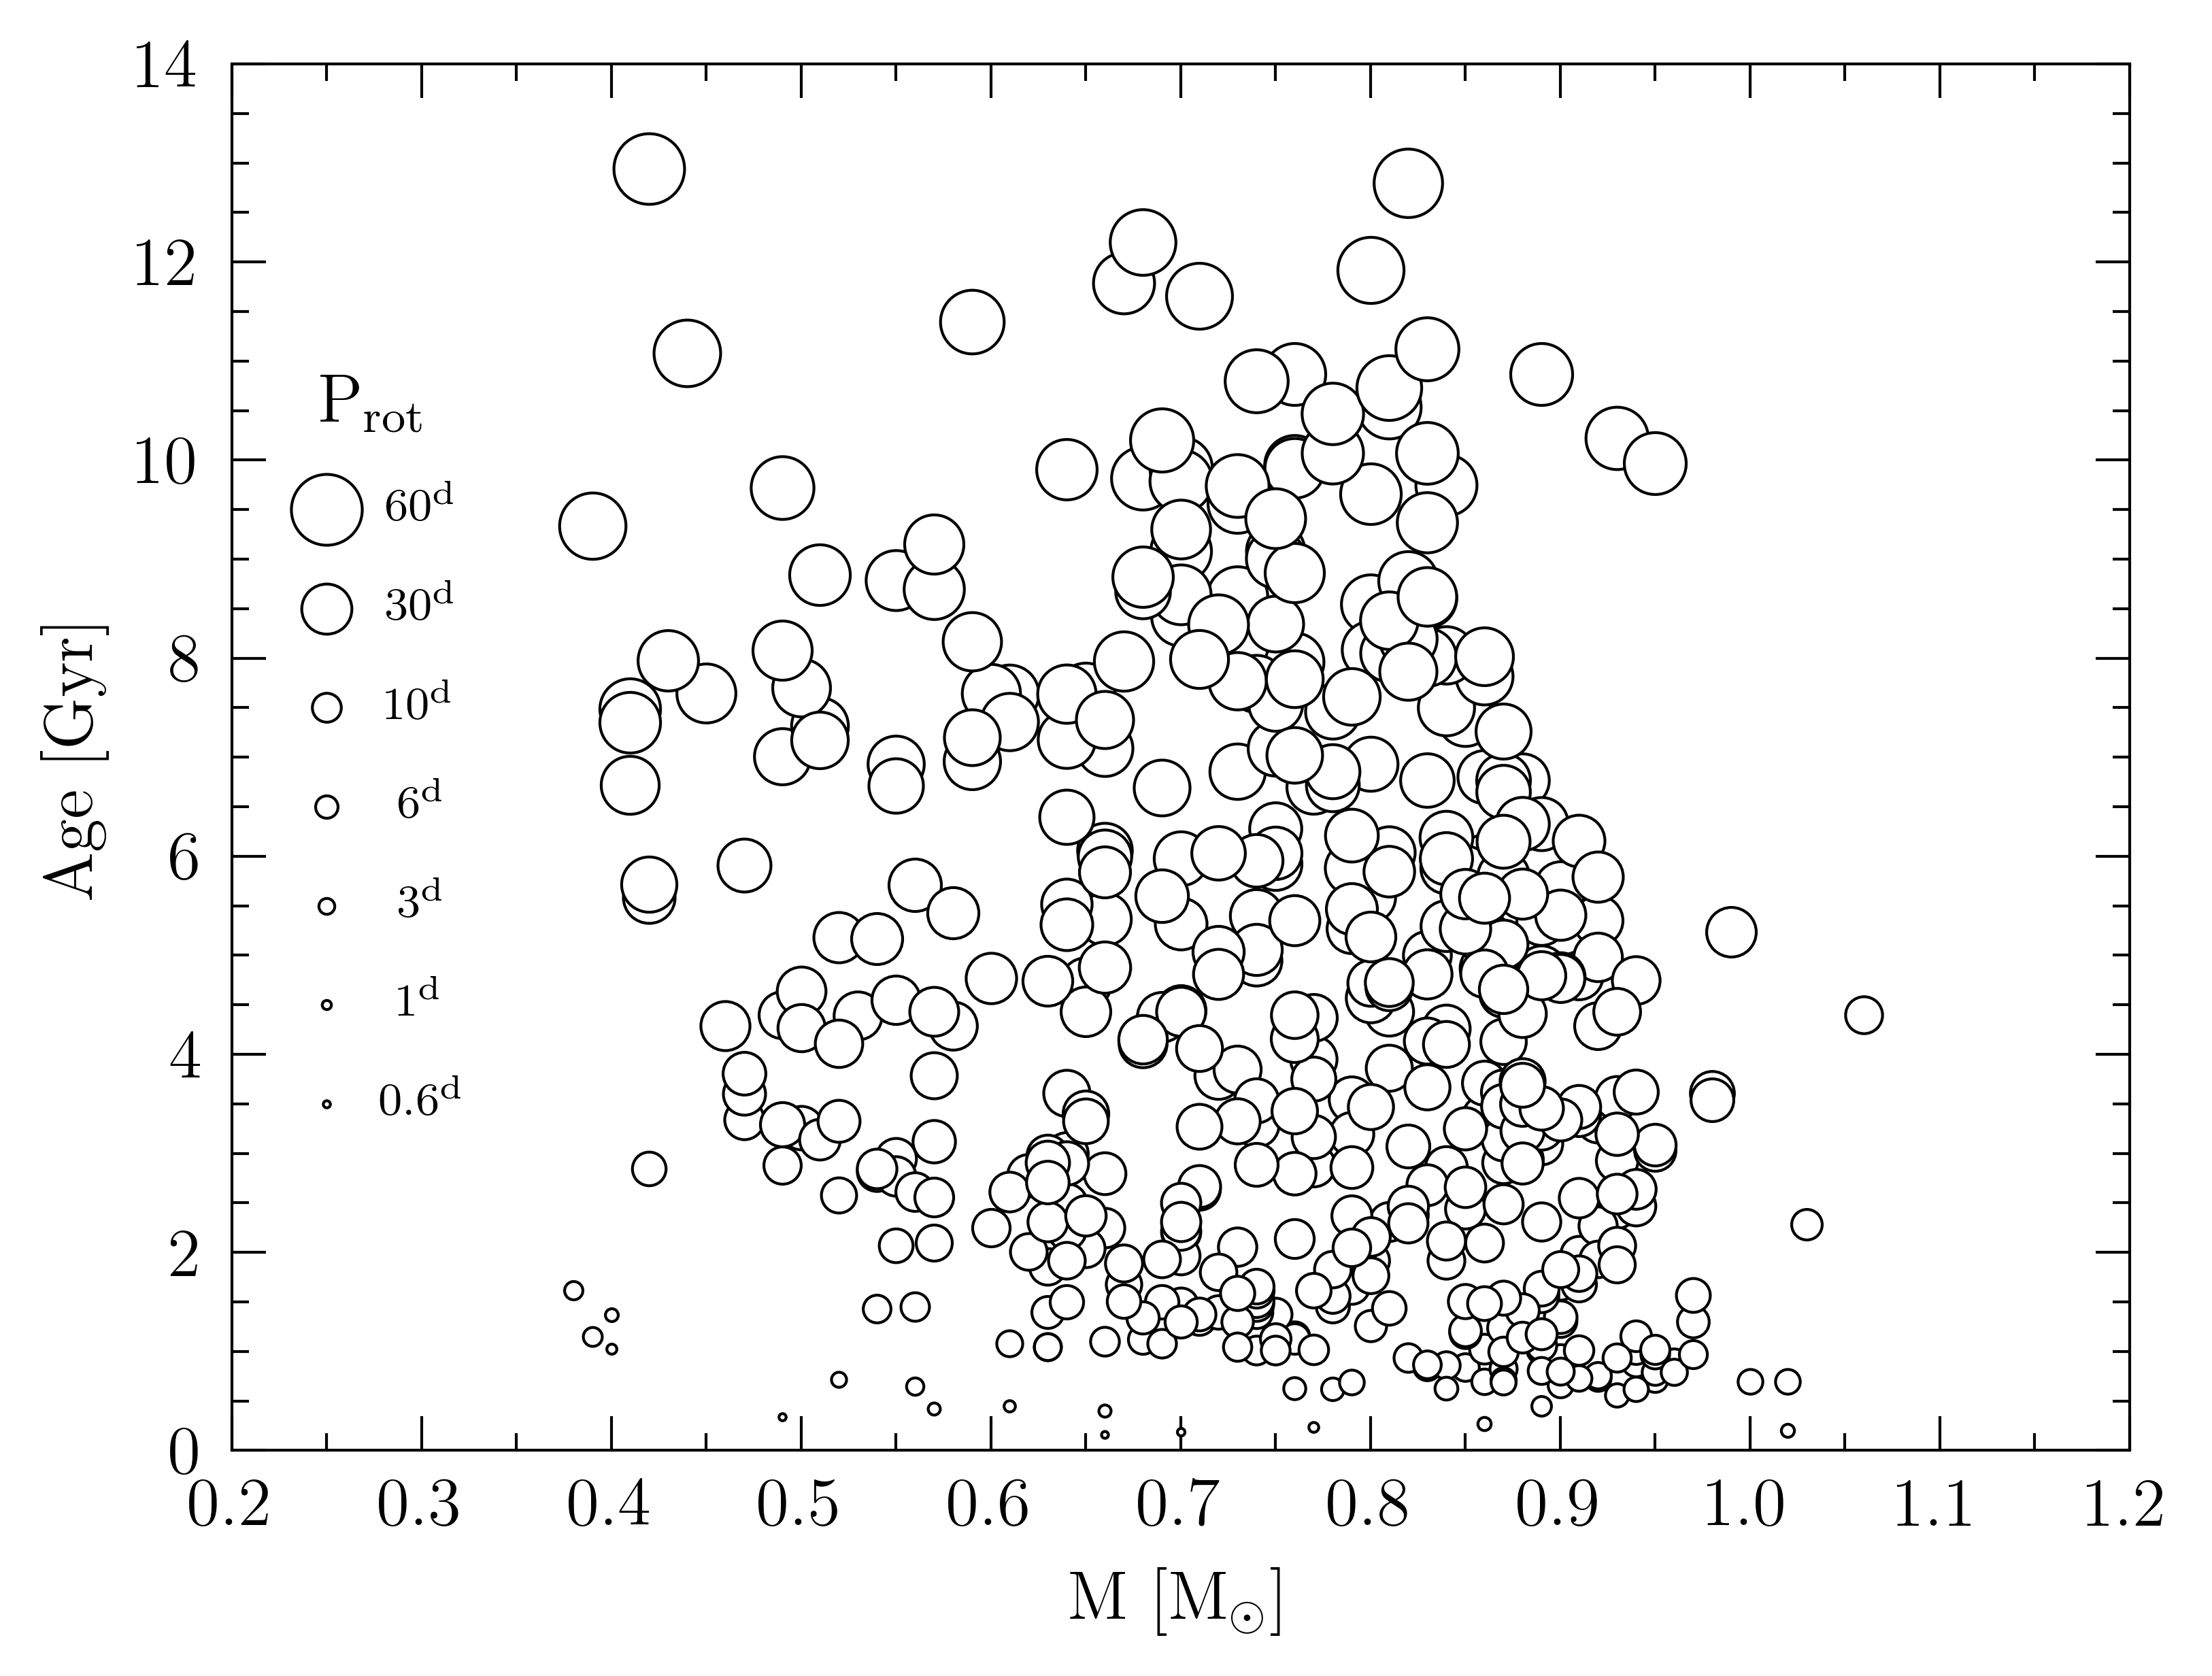

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')
ax.set_xlim(minMass,maxMass)
ax.set_xlabel(r'M [M$_\odot$]',fontsize=axisFontSize)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_ylim(minAge,maxAge)
ax.set_ylabel(r'Age [Gyr]',fontsize=axisFontSize)
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

for i in range(len(mass)):
    ax.plot(mass[i],age[i],marker='o',ms=pointSize[i],mec='black',mfc='white',mew=0.5,zorder=10)

# Scale on left

for i in range(len(scaleProt)):
    ax.plot(scaleMass-0.025,scaleAge[i],marker='o',ms=psScale[i],mec='black',mfc='white',mew=0.5,zorder=10)
    if scaleProt[i] < 1.0:
        scaleLabel = rf'{scaleProt[i]:.1f}$^{{\rm d}}$'
    else:
        scaleLabel = rf'{int(scaleProt[i]):d}$^{{\rm d}}$'
        
    ax.text(scaleMass+0.025,scaleAge[i],scaleLabel,va='center',ha='center',fontsize=labelFontSize)
    
ax.text(scaleMass,scaleAge[-1]+0.75,r'P$_{\rm rot}$',va='bottom',ha='center',fontsize=axisFontSize)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')